In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# **1. Load the Iris dataset and describe it:**

In [2]:
import pandas as pd
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Describe the dataset
description = iris_df.describe()
print(description)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


# **2. Data Cleaning:**

In [3]:
# Check for missing values
missing_values = iris_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop unnecessary features if any
# (For simplicity, assuming all features are necessary in this case)

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1])
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled['target'] = iris_df['target']

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


# **3. Feature Extraction using PCA:**

In [4]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
iris_pca = pca.fit_transform(iris_df_scaled.iloc[:, :-1])

# Variance explained by each principal component
variance_explained = pca.explained_variance_ratio_

# Rank features according to variance explained
feature_ranking = pd.DataFrame({'Feature': iris_df_scaled.columns[:-1], 'Variance Explained': variance_explained})
feature_ranking = feature_ranking.sort_values(by='Variance Explained', ascending=False)

print("Feature Ranking:\n", feature_ranking)

Feature Ranking:
              Feature  Variance Explained
0  sepal length (cm)            0.729624
1   sepal width (cm)            0.228508
2  petal length (cm)            0.036689
3   petal width (cm)            0.005179


# **4. Build Clustering Model using K-Means:**

In [5]:
from sklearn.cluster import KMeans

# (a) Test different number of features
# (b) Test different number of Clusters
# (c) Test different similarity measures

# Example for (a)
num_features = [2, 3, 4]

for n_features in num_features:
    # Select top n_features from PCA
    features_selected = iris_pca[:, :n_features]

    # Example for (b)
    num_clusters = [2, 3, 4]

    for n_clusters in num_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(features_selected)

        # Example for (c)
        # Use different similarity measures if needed

        # Density-based technique (e.g., DBSCAN)
        from sklearn.cluster import DBSCAN

        dbscan = DBSCAN(eps=0.5, min_samples=5)
        dbscan_labels = dbscan.fit_predict(features_selected)

        # Examine the size of generated clusters
        cluster_sizes = pd.Series(labels).value_counts()
        print(f"Number of features: {n_features}, Number of Clusters: {n_clusters}")
        print("K-Means Cluster Sizes:\n", cluster_sizes)

        dbscan_cluster_sizes = pd.Series(dbscan_labels).value_counts()
        print("DBSCAN Cluster Sizes:\n", dbscan_cluster_sizes)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of features: 2, Number of Clusters: 2
K-Means Cluster Sizes:
 0    100
1     50
Name: count, dtype: int64
DBSCAN Cluster Sizes:
  1    90
 0    48
-1    12
Name: count, dtype: int64
Number of features: 2, Number of Clusters: 3
K-Means Cluster Sizes:
 0    53
1    50
2    47
Name: count, dtype: int64
DBSCAN Cluster Sizes:
  1    90
 0    48
-1    12
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of features: 2, Number of Clusters: 4
K-Means Cluster Sizes:
 2    55
0    45
1    26
3    24
Name: count, dtype: int64
DBSCAN Cluster Sizes:
  1    90
 0    48
-1    12
Name: count, dtype: int64
Number of features: 3, Number of Clusters: 2
K-Means Cluster Sizes:
 0    100
1     50
Name: count, dtype: int64
DBSCAN Cluster Sizes:
  1    76
 0    45
-1    29
Name: count, dtype: int64
Number of features: 3, Number of Clusters: 3
K-Means Cluster Sizes:
 2    53
1    50
0    47
Name: count, dtype: int64
DBSCAN Cluster Sizes:
  1    76
 0    45
-1    29
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of features: 3, Number of Clusters: 4
K-Means Cluster Sizes:
 2    53
0    47
3    28
1    22
Name: count, dtype: int64
DBSCAN Cluster Sizes:
  1    76
 0    45
-1    29
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of features: 4, Number of Clusters: 2
K-Means Cluster Sizes:
 0    100
1     50
Name: count, dtype: int64
DBSCAN Cluster Sizes:
  1    71
 0    45
-1    34
Name: count, dtype: int64
Number of features: 4, Number of Clusters: 3
K-Means Cluster Sizes:
 2    53
1    50
0    47
Name: count, dtype: int64
DBSCAN Cluster Sizes:
  1    71
 0    45
-1    34
Name: count, dtype: int64
Number of features: 4, Number of Clusters: 4
K-Means Cluster Sizes:
 2    53
0    47
3    28
1    22
Name: count, dtype: int64
DBSCAN Cluster Sizes:
  1    71
 0    45
-1    34
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **5. Visualize and Interpret Results:**

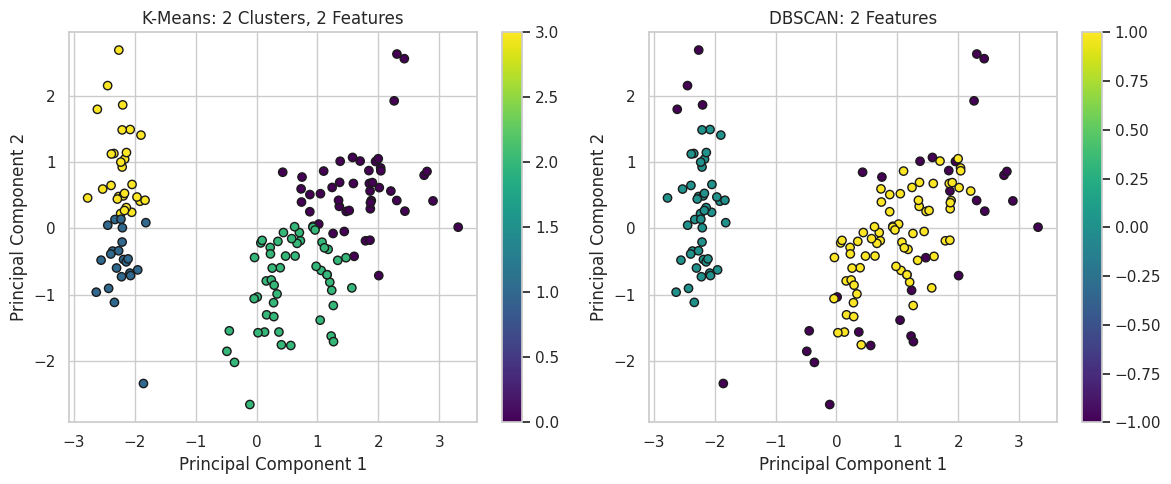

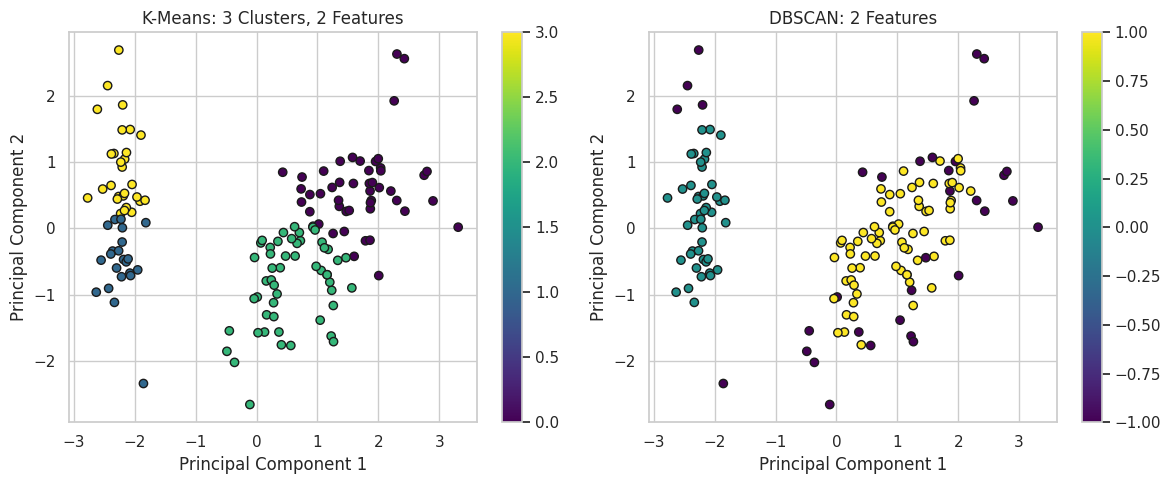

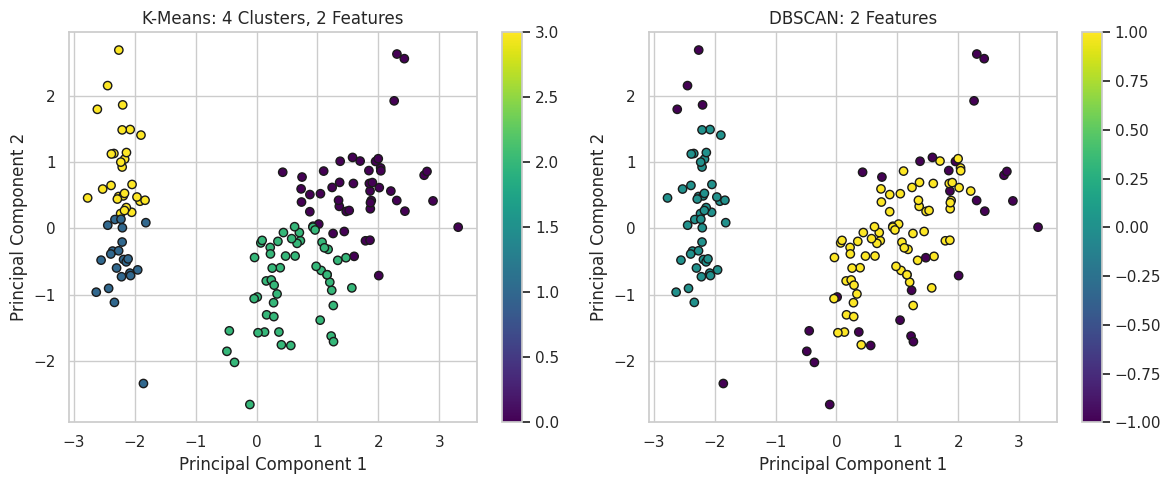

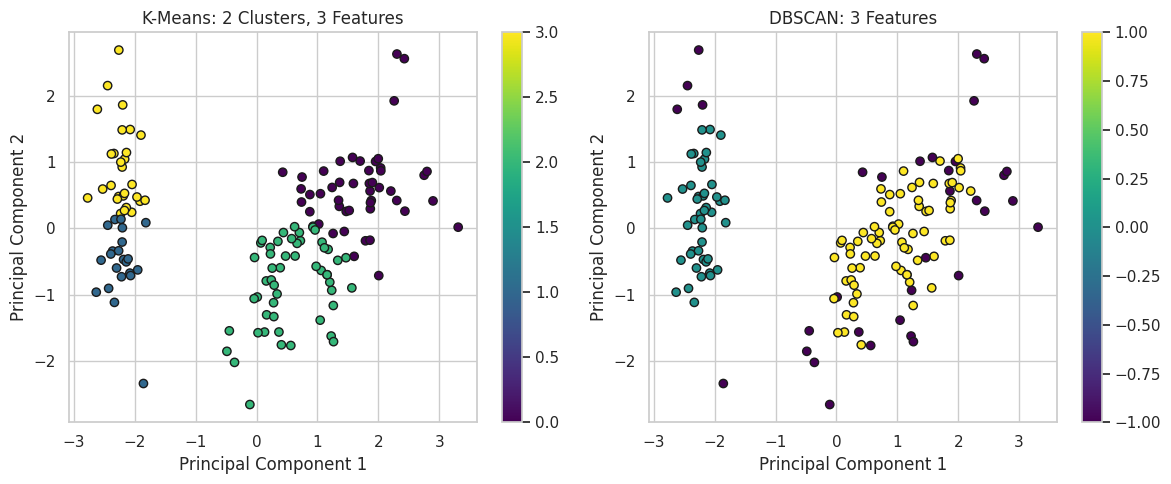

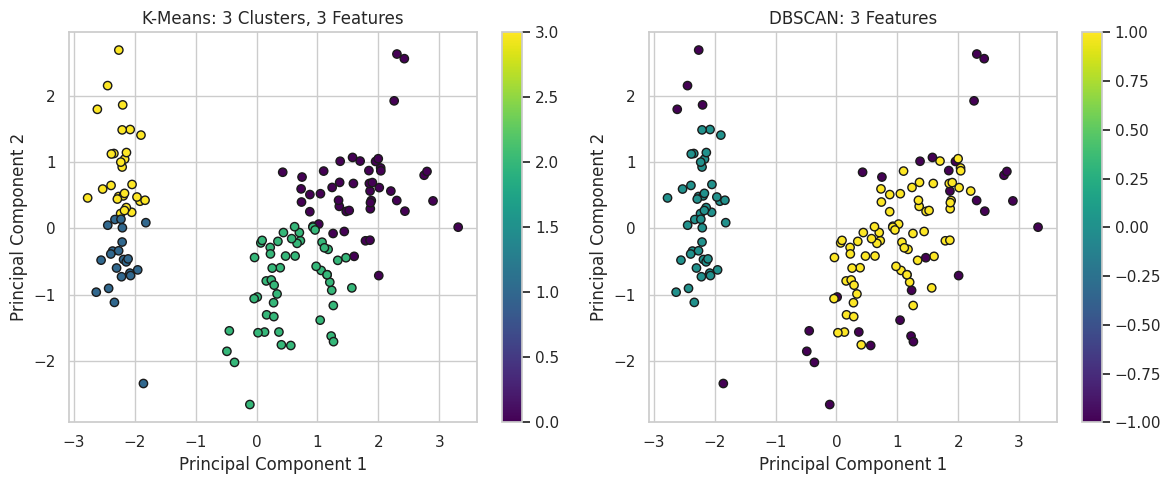

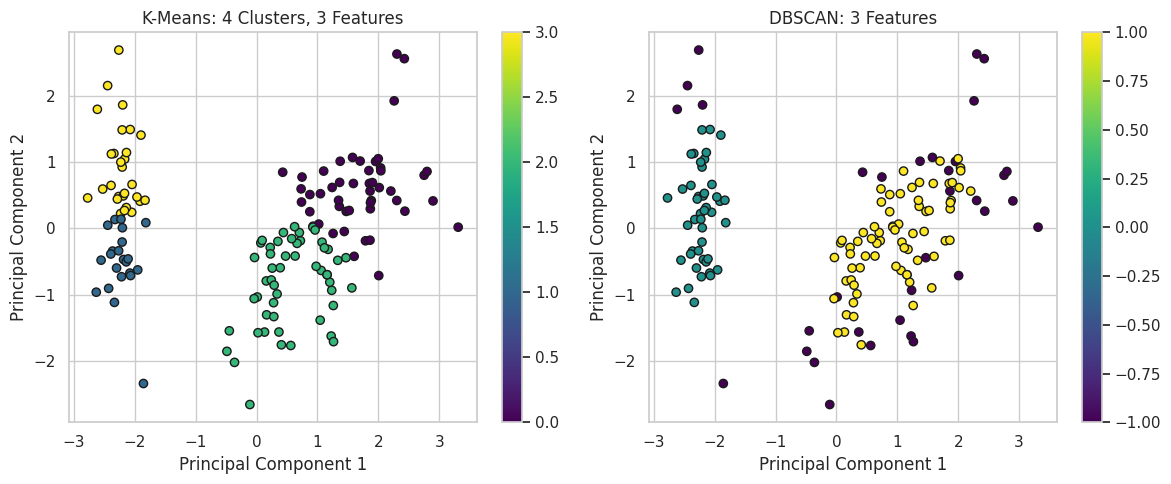

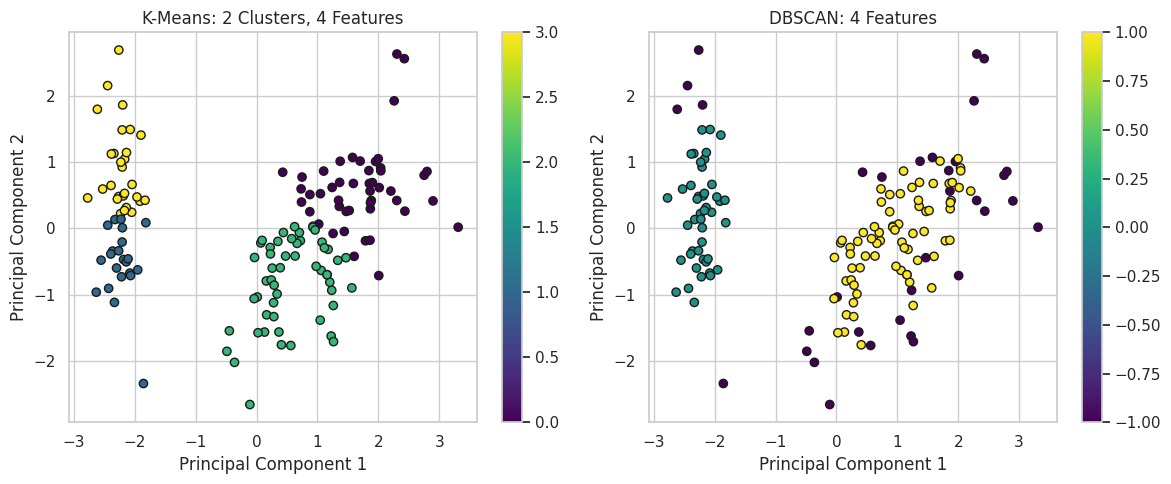

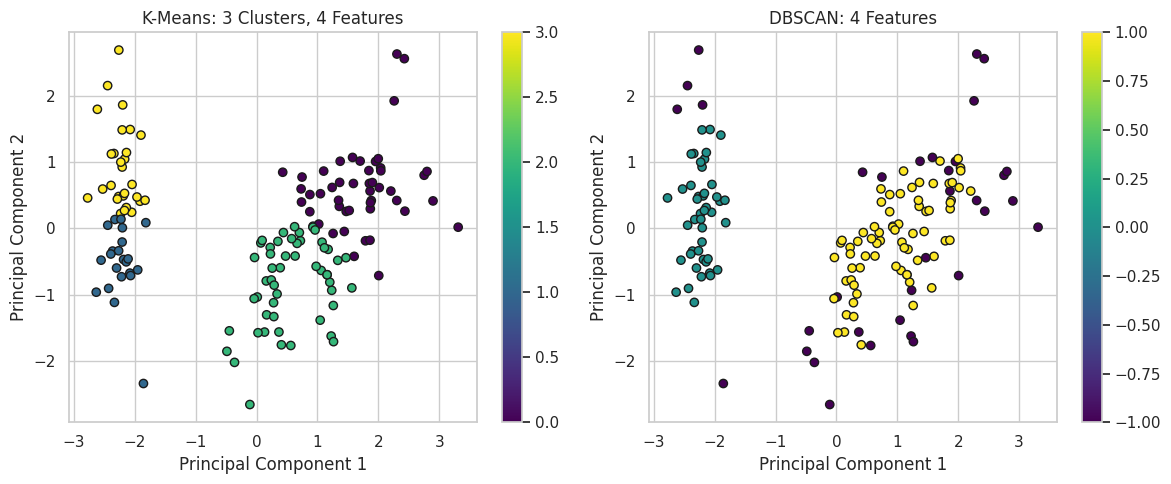

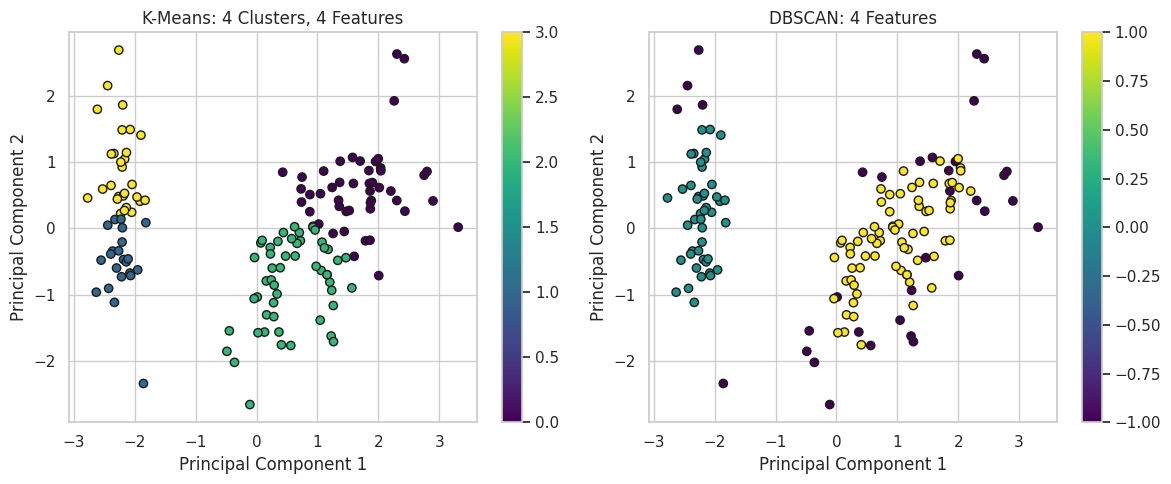

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set(style="whitegrid")

# Visualization for different configurations
for n_features in num_features:
    for n_clusters in num_clusters:
        features_selected = iris_pca[:, :n_features]

        # Scatter plot for K-Means
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.title(f'K-Means: {n_clusters} Clusters, {n_features} Features')
        plt.scatter(features_selected[:, 0], features_selected[:, 1], c=labels, cmap='viridis', edgecolor='k')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar()

        # Scatter plot for DBSCAN
        plt.subplot(1, 2, 2)
        plt.title(f'DBSCAN: {n_features} Features')
        plt.scatter(features_selected[:, 0], features_selected[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar()

        plt.tight_layout()
        plt.show()